In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

In [2]:
timestamps = np.array([0, 10, 30, 60, 120, 180])

# values in the list are in mmol/L
# 1 mmol/L = 18.016 mg/dL
healthy_vals = np.array([0.33, 0.5, 1, 1.055, 0.74, 0.73]) * 18.016
cirrhosis_vals = np.array([0.33, 1, 2.525, 2.465, 1.665, 1.345]) * 18.016

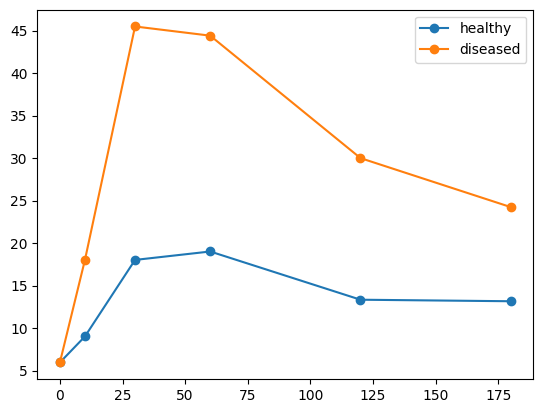

In [3]:
plt.plot(timestamps, healthy_vals, '-o', label="healthy")
plt.plot(timestamps, cirrhosis_vals, '-o', label="diseased")
plt.legend()

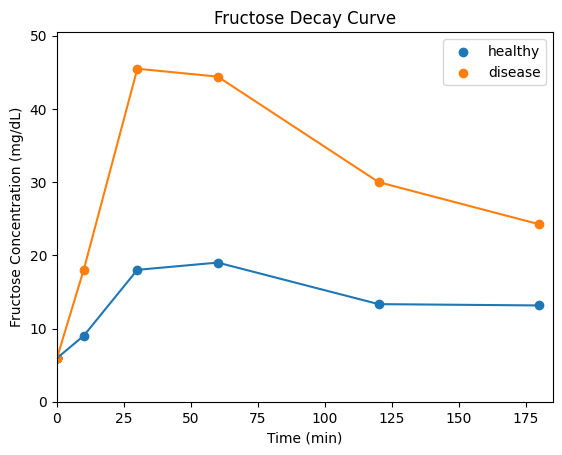

In [20]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()

# Define the initial plots with empty data
xdata1, ydata1 = [], []
scatter1 = ax.scatter(xdata1, ydata1, color='#1f77b4', label="healthy")

xdata2, ydata2 = [], []
scatter2 = ax.scatter(xdata2, ydata2, color='#ff7f0e', label="disease")

line1, = ax.plot([], [], color='#1f77b4')
line2, = ax.plot([], [], color='#ff7f0e')

ax.set_xlabel('Time (min)')
ax.set_ylabel('Fructose Concentration (mg/dL)')
ax.set_title('Fructose Decay Curve')
ax.legend(loc='upper right')

# Define the update function
def update(i, timestamps, data1, data2):
    # Add a new pair of data points to the first set
    x_new1 = timestamps[i]
    y_new1 = data1[i]
    xdata1.append(x_new1)
    ydata1.append(y_new1)
    
    # Update the scatter plot for the first set
    scatter1.set_offsets(np.c_[xdata1,ydata1])
    line1.set_data(xdata1, ydata1)
    
    # Add a new pair of data points to the second set
    x_new2 = timestamps[i]
    y_new2 = data2[i]
    xdata2.append(x_new2)
    ydata2.append(y_new2)
    
    # Update the scatter plot for the second set
    scatter2.set_offsets(np.c_[xdata2,ydata2])
    line2.set_data(xdata2, ydata2)
    
    # Set the axis limits
    ax.set_xlim([0, max(timestamps[-1], timestamps[-1])+5])
    ax.set_ylim([0, max(max(data1), max(data2))+5])
    
    # Return the scatter plot objects
    return scatter1, scatter2

# Define the data
timestamps = np.array([0, 10, 30, 60, 120, 180])
healthy_vals = np.array([0.33, 0.5, 1, 1.055, 0.74, 0.73]) * 18.016
cirrhosis_vals = np.array([0.33, 1, 2.525, 2.465, 1.665, 1.345]) * 18.016

# Set the animation interval to 100 milliseconds
interval = 1500

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(timestamps), fargs=(timestamps, healthy_vals, cirrhosis_vals), interval=interval, blit=True)

# Save the animation to a GIF file
ani.save('animation.gif', writer='pillow', dpi=300)

# Show the animation
plt.show()
